In [34]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.1 MB/s  0:00:00

   ---------------------------------------- 0/5 [tqdm]
   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [click]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ --------------- 3/5 [nltk]
   ------------------------ 

In [35]:
!pip install wordcloud

In [36]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [38]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [45]:
data = pd.read_csv(
    'Twitter_Training.csv',
    header=None,
    names=['id', 'topic', 'label', 'text']
)

In [40]:
print(data.head())
print(data.info())
print(data.isnull().sum())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Po

In [43]:
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [46]:
print(data.head())
print(data.columns)

     id        topic     label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Index(['id', 'topic', 'label', 'text'], dtype='object')


In [47]:
data = data.dropna(subset=['text'])

In [48]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [49]:
data['Predicted_Sentiment'] = data['text'].apply(get_sentiment)

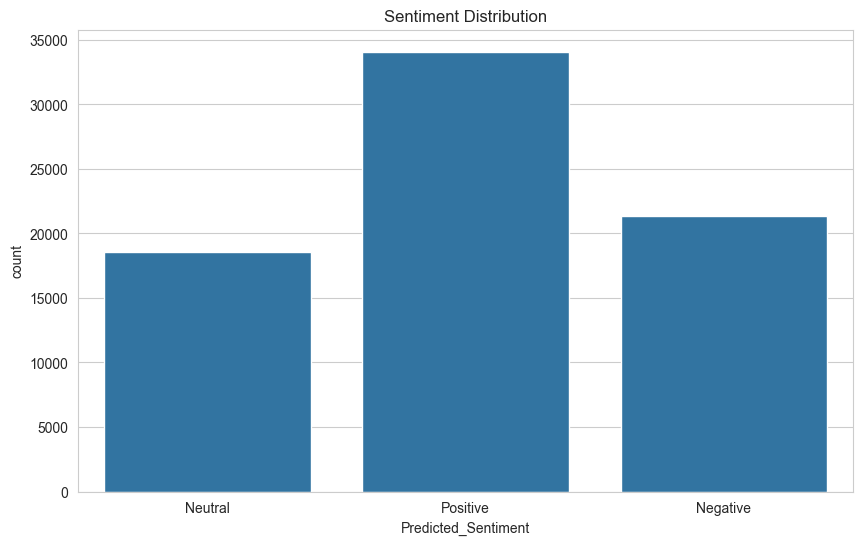

In [50]:
sns.countplot(x='Predicted_Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [51]:
print(data[['label', 'Predicted_Sentiment']].head())

      label Predicted_Sentiment
0  Positive             Neutral
1  Positive             Neutral
2  Positive             Neutral
3  Positive             Neutral
4  Positive             Neutral
